In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### DataSet:

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [4]:
# List with columns names for the df
cols = ['fLength', 'fWidht', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# df from csv read and headed
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

,fLength,fWidht,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# Label Encoding for Gamma 'g'
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

,fLength,fWidht,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


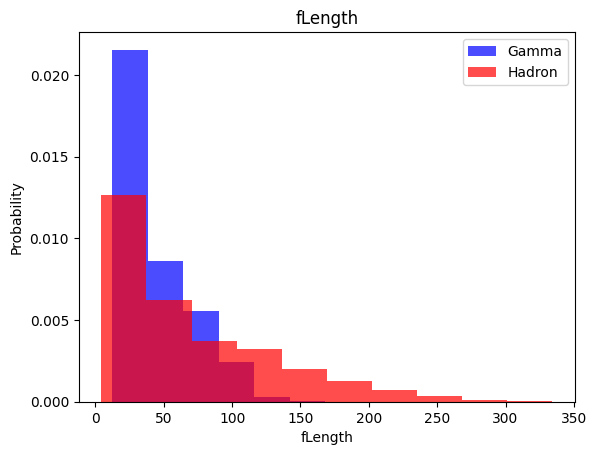

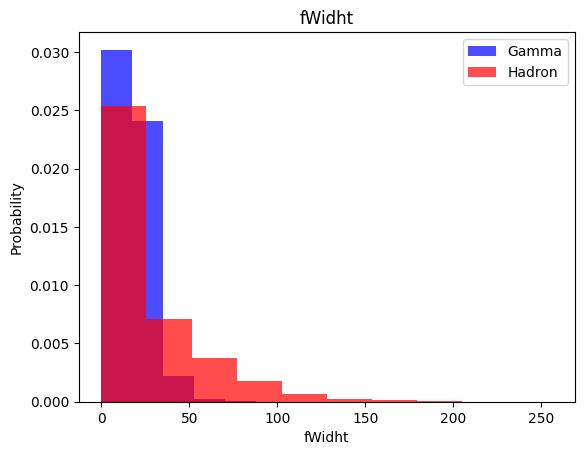

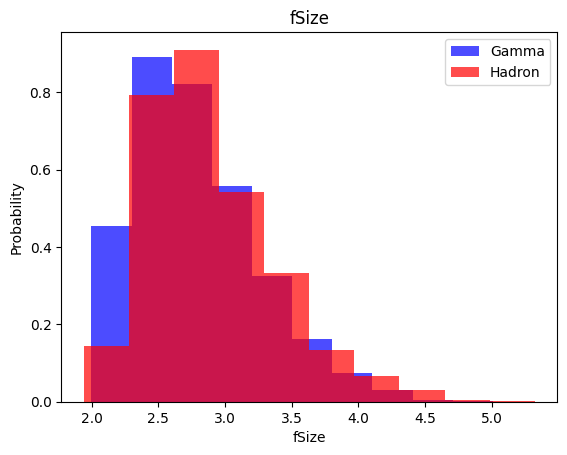

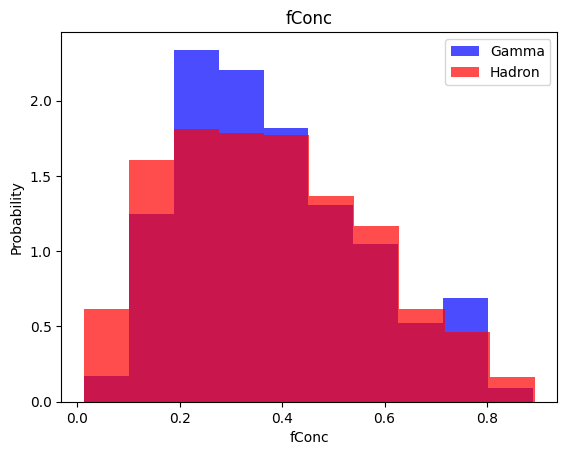

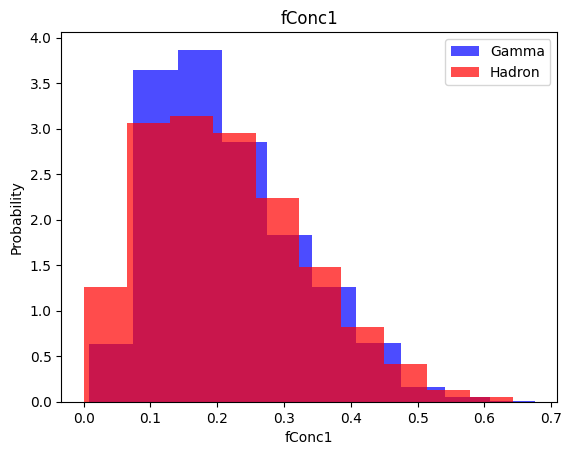

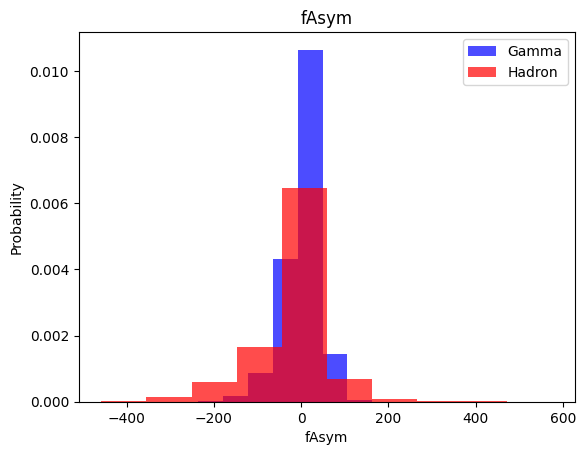

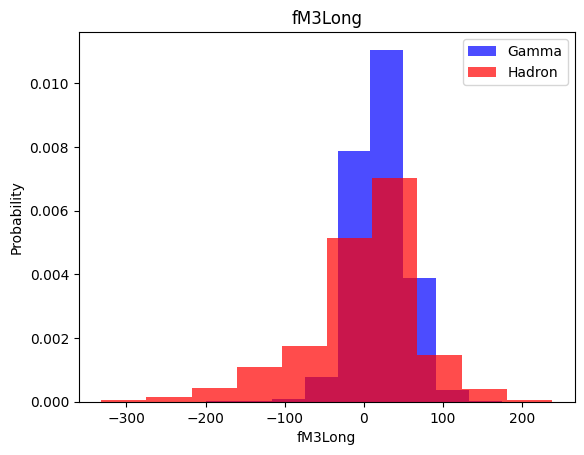

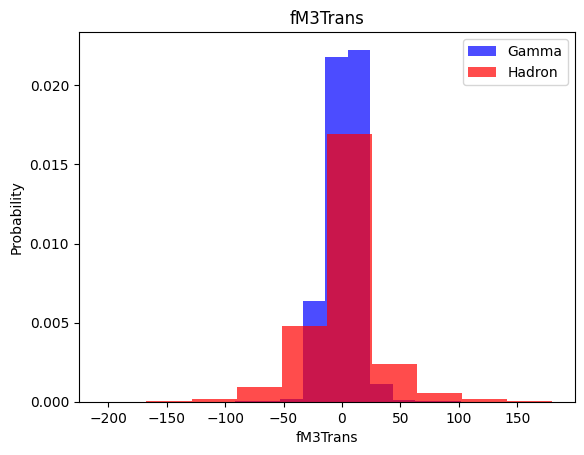

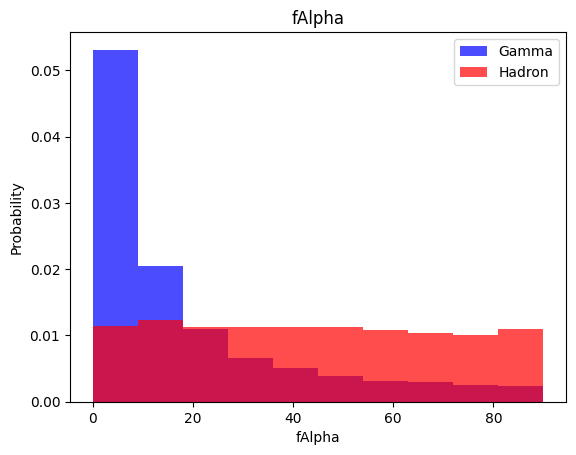

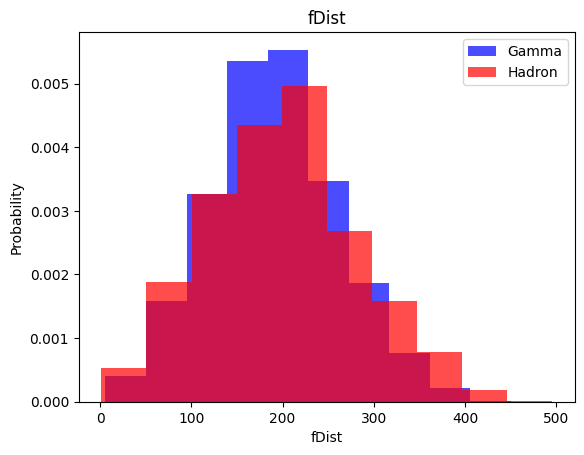

In [7]:
# Loop plotting histograms for each DataSet Attribute, normalized with probabilities instead of raw count (density=True)
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validation, test datasets

In [9]:
# Splitting the dataset in 3 portions for training (60%), validation (20%) and testing (20%) of the model
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
# Function made to scale the dataframe Features values (X) and to oversample the Label values (Y)
# Oversample is used for distribute evenly the Features and Label values in order to prevent biased predictions in the model
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y

In [11]:
# Each portion of the splitted dataframe is passed to the Scale_dataset function and the scaled data, features and labels are saved
# in 3 different variables for each stage of the model development (Training, Validation and Testing)
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [12]:
# Confirmation for the oversampling (The labeling categories count should be almost equal)
print(f'The number of records for model training is: {len(Y_train)}')
print(f'The number of records classified as Gamma is: {sum(Y_train == 1)}')
print(f'The number of records classified as Hadron is: {sum(Y_train == 0)}')

The number of records for model training is: 14800
The number of records classified as Gamma is: 7400
The number of records classified as Hadron is: 7400


In [13]:
print(f'The number of records for model training is: {len(Y_test)}')
print(f'The number of records classified as Gamma is: {sum(Y_test == 1)}')
print(f'The number of records classified as Hadron is: {sum(Y_test == 0)}')

The number of records for model training is: 3804
The number of records classified as Gamma is: 2463
The number of records classified as Hadron is: 1341


## K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
Y_pred = knn_model.predict(X_test)

In [17]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1341
           1       0.83      0.89      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [20]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1341
           1       0.74      0.89      0.81      2463

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## Log Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
Y_pred = log_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1341
           1       0.85      0.83      0.84      2463

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



## Support Vector Machines

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [26]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1341
           1       0.90      0.89      0.89      2463

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Net

In [28]:
import tensorflow as tf

In [1]:
# Creation and structuration for the Neural Network Model
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape =(10,)),
        tf.keras.layers.DropOut(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.DropOut(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Neural Network compilation - Params: Optimizer (Learning rate)
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])

    history = nn_model.fit(
        X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
        )
    
    return nn_model, history

In [3]:
# Plotting the loss over all the different Epochs (Training Cycles)
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the accuracy over all the Epochs
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
plot_loss(history)
plot_accuracy(history)

NameError: name 'history' is not defined